In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stocks=pd.read_csv("../base/stocksV2.csv", sep=';',parse_dates=['date'])


In [3]:
stocks.head()

,date,id_produit,entrepot,niveau_stock
0,01/06/2024,P00001,Lyon,88
1,22/04/2024,P00001,Paris,141
2,25/09/2024,P00002,Lyon,286
3,18/02/2024,P00003,Paris,177
4,13/07/2024,P00003,Lyon,95


In [4]:
stocks.shape

(1706, 4)

In [5]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1706 entries, 0 to 1705
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1706 non-null   object
 1   id_produit    1706 non-null   object
 2   entrepot      1706 non-null   object
 3   niveau_stock  1706 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 53.4+ KB


In [6]:
stocks.isnull().sum()

date            0
id_produit      0
entrepot        0
niveau_stock    0
dtype: int64

In [7]:
# Check for duplicates
duplicates = stocks.duplicated()
print("Number of duplicates:", duplicates.sum())

Number of duplicates: 0


In [8]:
#type conversion
stocks['date'] = pd.to_datetime(stocks['date'], format='%d/%m/%Y')

In [9]:
# Check for unique values in 'id_produit'
stocks["entrepot"].unique(),stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1706 entries, 0 to 1705
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1706 non-null   datetime64[ns]
 1   id_produit    1706 non-null   object        
 2   entrepot      1706 non-null   object        
 3   niveau_stock  1706 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 53.4+ KB


(array(['Lyon', 'Paris', 'Marseille'], dtype=object), None)

**Interprétation :**
- la table **stocks** contient:
    *  4 variables: *date, id_produit, entrepôt,niveau_stock*
    * 30000 observations
- Aucune donnée manquante dans la table.
- **1000** produits différents dans la table.
- **3** entrepôts qui se trouvent à Paris, Lyon et Marseille.

In [ ]:
stocks.head()

,date,id_produit,entrepot,niveau_stock
0,2024-06-01,P00001,Lyon,88
1,2024-04-22,P00001,Paris,141
2,2024-09-25,P00002,Lyon,286
3,2024-02-18,P00003,Paris,177
4,2024-07-13,P00003,Lyon,95


## Analyse des Niveaux de Stock

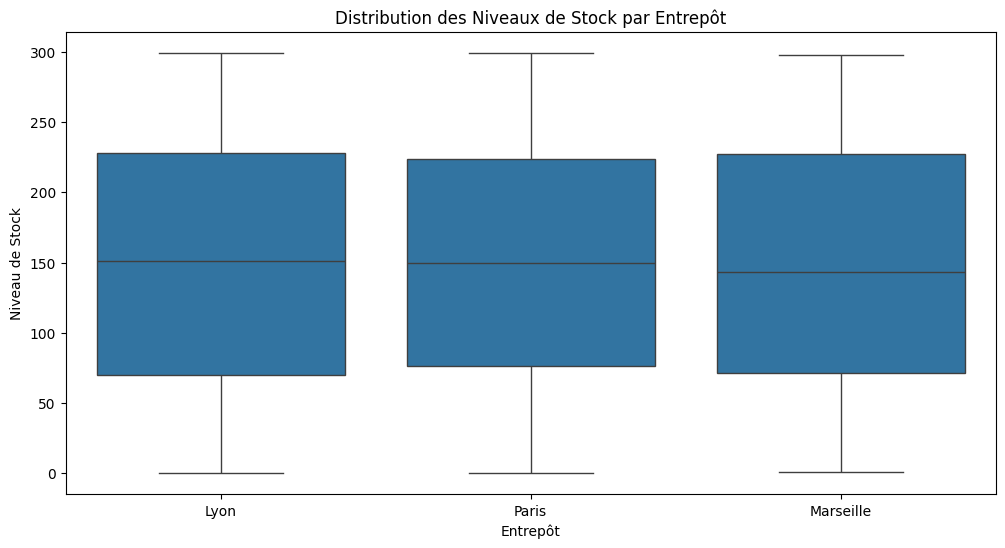

In [14]:
# Analyse des niveaux de stock par entrepôt
plt.figure(figsize=(12, 6))
sns.boxplot(x='entrepot', y='niveau_stock', data=stocks)
plt.title('Distribution des Niveaux de Stock par Entrepôt')
plt.xlabel('Entrepôt')
plt.ylabel('Niveau de Stock')
plt.show()


C:\Users\Djo\AppData\Local\Temp\ipykernel_2380\1949756130.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  stock_mensuel = stocks.groupby(['entrepot', pd.Grouper(key='date', freq='M')])['niveau_stock'].mean().reset_index()


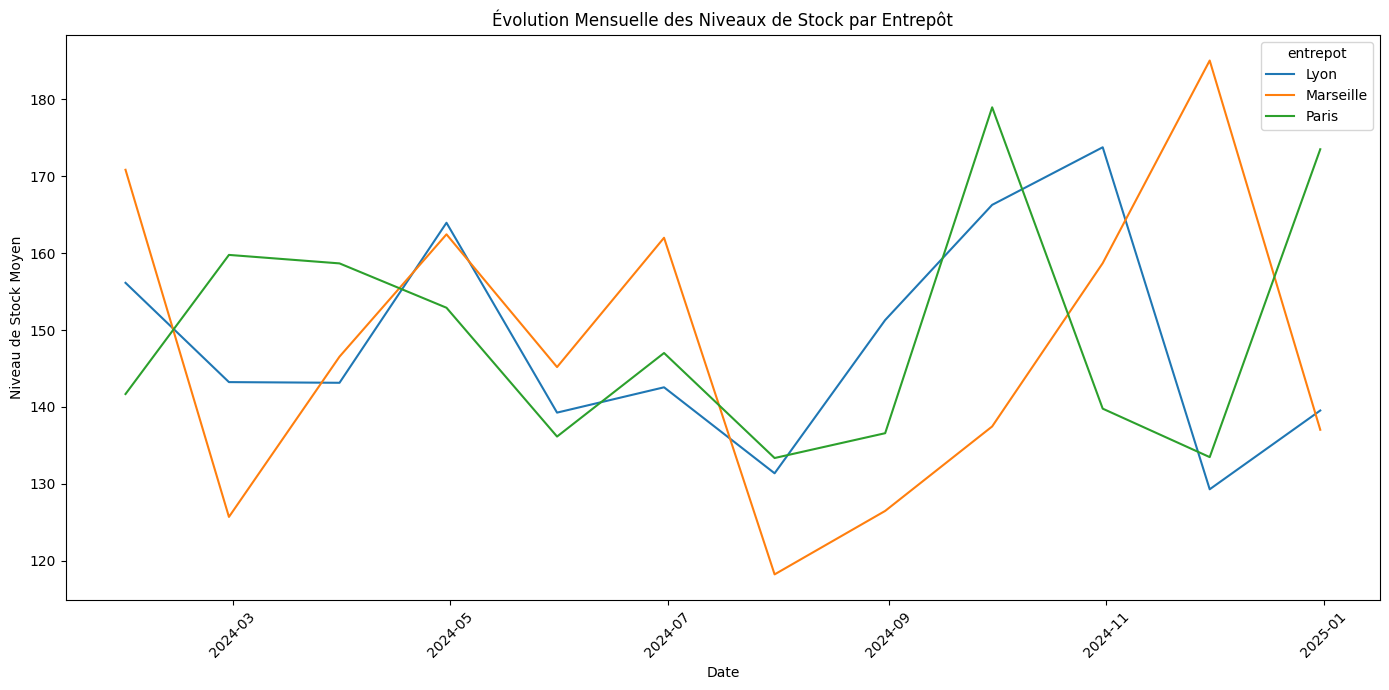

In [15]:

# Évolution des niveaux de stock moyens au fil du temps
stock_mensuel = stocks.groupby(['entrepot', pd.Grouper(key='date', freq='M')])['niveau_stock'].mean().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='niveau_stock', hue='entrepot', data=stock_mensuel)
plt.title('Évolution Mensuelle des Niveaux de Stock par Entrepôt')
plt.xlabel('Date')
plt.ylabel('Niveau de Stock Moyen')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:

# Identification des produits avec des niveaux de stock critiques
stock_actuel = stocks.sort_values('date').drop_duplicates(subset=['id_produit', 'entrepot'], keep='last')
stock_critique = stock_actuel[stock_actuel['niveau_stock'] < 20].sort_values('niveau_stock')

print("Produits en situation de stock critique (<20 unités):")
print(stock_critique[['id_produit', 'entrepot', 'niveau_stock']].head(10))


Produits en situation de stock critique (<20 unités):
     id_produit   entrepot  niveau_stock
642      P00377       Lyon             0
1286     P00758      Paris             0
1152     P00678       Lyon             0
543      P00318       Lyon             0
1150     P00676       Lyon             0
957      P00567      Paris             0
1185     P00698      Paris             0
1357     P00797  Marseille             1
249      P00148       Lyon             1
574      P00338      Paris             1
